In [2]:
from matplotlib import pyplot as plt
from matplotlib import rc
from matplotlib.colors import LogNorm
import numpy as np
import pandas as pd
import seaborn as sns

import distutils.spawn
import glob
import os
import pickle

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [3]:
sns.set(font_scale=1.5)

if distutils.spawn.find_executable('latex'):
    rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
    rc('text', usetex=True)

In [4]:
exp_name = 'perf-weights-regularity'

In [5]:
results = {'accuracy': [], 'regularity': [], 'lr': [], 'scaling': []}
for directory in glob.glob(os.path.join('results', exp_name, '*')):
    with open(os.path.join(directory, 'config.pkl'), 'rb') as f:
        config = pickle.load(f)
        results['regularity'].append(config['model-config']['regularity'])
        results['lr'].append(config['model-config']['lr'])
        results['scaling'].append(config['model-config']['scaling_beta'])
    with open(os.path.join(directory, 'metrics.pkl'), 'rb') as f:
        metrics = pickle.load(f)
        results['accuracy'].append(metrics['test_accuracy'])

In [6]:
df = pd.DataFrame.from_dict(results)

In [7]:
df.head()

,accuracy,regularity,lr,scaling
0,0.9501,0.366667,0.0001,0.633333
1,0.9115,0.544444,0.1000,0.900000
2,0.1061,0.455556,0.0001,0.100000
3,0.0980,0.455556,0.1000,0.544444
4,0.9607,0.455556,0.0100,0.455556


In [8]:
df2 = pd.pivot_table(df, index='scaling', columns='regularity', values='accuracy', aggfunc=np.max)

In [9]:
df2.index = np.round(df2.index, 2)
df2.columns = np.round(df2.columns, 2)

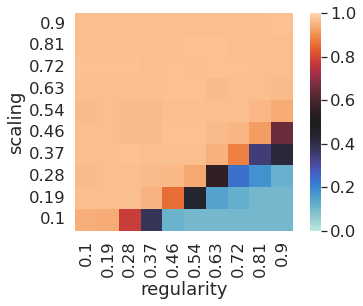

In [19]:
sns.heatmap(df2[::-1], vmin=0, vmax=1, center=0.5, xticklabels=1, yticklabels=1, square=True)
#plt.savefig('figures/perf-mnist-reg-scaling.pdf', bbox_inches='tight')
plt.show()

In [11]:
df['acc_max'] = df.groupby(['scaling', 'regularity'])['accuracy'].transform(max)

In [12]:
df.head()

,accuracy,regularity,lr,scaling,acc_max
0,0.9501,0.366667,0.0001,0.633333,0.9670
1,0.9115,0.544444,0.1000,0.900000,0.9673
2,0.1061,0.455556,0.0001,0.100000,0.1095
3,0.0980,0.455556,0.1000,0.544444,0.9676
4,0.9607,0.455556,0.0100,0.455556,0.9704


In [13]:
df3 = pd.pivot_table(df[df['accuracy']==df['acc_max']], index='scaling', columns='regularity', values='lr', aggfunc=np.max)

In [14]:
df3.index = np.round(df2.index, 2)
df3.columns = np.round(df2.columns, 2)

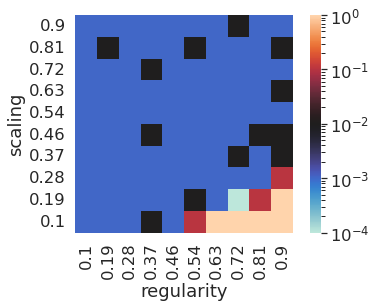

In [15]:
sns.heatmap(df3[::-1], vmin=0, vmax=1, center=0.5, xticklabels=1, yticklabels=1, square=True, norm=LogNorm())
#plt.savefig('figures/perf-mnist-reg-scaling.pdf', bbox_inches='tight')
plt.show()

In [16]:
df4 = pd.pivot_table(df[df['lr']==0.0001], index='scaling', columns='regularity', values='accuracy', aggfunc=np.max)

In [17]:
df4.index = np.round(df2.index, 2)
df4.columns = np.round(df2.columns, 2)

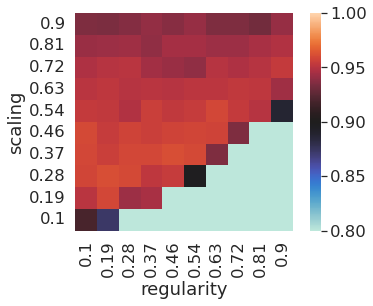

In [18]:
sns.heatmap(df4[::-1], vmin=0.8, vmax=1, center=0.9, xticklabels=1, yticklabels=1, square=True)
plt.savefig('figures/perf-mnist-reg-scaling-fixed-lr.pdf', bbox_inches='tight')
plt.show()